In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Twitter_Data.csv')

In [3]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [4]:
df.dropna(inplace=True)

In [5]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
stop_words = stopwords.words('english')
df['clean_text'] = df['clean_text'].apply(lambda x:' '.join(x.lower() for x in x.split()))
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

In [7]:
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer(language='english')

In [8]:
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(stemmer.stem(x) for x in x.split() if x not in stop_words))

In [9]:
import string
arr=[]
for a in string.punctuation:
    arr.append(a)

In [14]:
df['clean_text']=df['clean_text'].apply(lambda x: ' '.join(w for w in x.split() if w not in arr))
df['clean_text']=df['clean_text'].apply(lambda x: ' '.join(w for w in x.split() if w[0]!='@'))

In [15]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=1000, split=' ') 

In [16]:
tokenizer.fit_on_texts(df['clean_text'].values)

In [17]:
X = tokenizer.texts_to_sequences(df['clean_text'].values)
X

[[1, 54, 26, 278, 897, 57, 113, 28, 15, 21, 995, 113, 271],
 [87, 994, 374, 736, 8, 1],
 [10, 8, 1, 774, 3, 460, 23, 384, 109, 1, 37, 1],
 [43, 25, 52, 118, 1, 84, 953, 191, 239, 994, 41, 370, 30, 52],
 [235, 791, 32, 74, 40, 65, 794, 1, 96],
 [996, 410],
 [404, 593, 722, 9, 1, 80],
 [30, 5, 1, 16],
 [957, 7, 2, 116, 258, 125, 617, 1, 496, 12, 7, 490, 770, 125],
 [34, 1],
 [82,
  5,
  520,
  606,
  42,
  953,
  562,
  45,
  658,
  564,
  776,
  10,
  38,
  19,
  16,
  562,
  5,
  142,
  119,
  1],
 [187, 4, 45, 462, 99, 782, 543, 35, 1, 8],
 [868, 1, 386],
 [13, 8, 24, 175, 235, 1, 7, 68, 73, 25, 8, 629, 109],
 [13, 8, 24, 175, 235, 1, 7, 68, 73, 25, 109],
 [8, 33, 28, 336, 817, 9, 1, 3, 33],
 [8, 1, 170, 57],
 [8, 571, 12, 38, 437, 1, 854, 68, 7],
 [18,
  317,
  263,
  87,
  1,
  988,
  553,
  10,
  42,
  52,
  649,
  42,
  306,
  149,
  455,
  348,
  455,
  115,
  22],
 [688, 424, 52, 154, 139, 94, 1, 106, 476, 665, 67, 94],
 [13, 860, 47, 4, 8, 1, 94, 11, 245, 6, 25, 666, 25, 1, 94,

In [18]:
X = pad_sequences(X)
X

array([[  0,   0,   0, ..., 995, 113, 271],
       [  0,   0,   0, ..., 736,   8,   1],
       [  0,   0,   0, ...,   1,  37,   1],
       ...,
       [  0,   0,   0, ...,   0, 930, 359],
       [  0,   0,   0, ..., 331, 105, 526],
       [  0,   0,   0, ...,  28, 336, 137]])

In [19]:

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['category'] = lb.fit_transform(df['category'])

In [20]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential


In [21]:
model = Sequential()
model.add(Embedding(1000, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 39, 120)           120000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 39, 120)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 176)               209088    
_________________________________________________________________
dense (Dense)                (None, 3)                 531       
Total params: 329,619
Trainable params: 329,619
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
y=pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [50]:
y_train.describe()

count    130375.000000
mean          1.226401
std           0.781124
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: category, dtype: float64

In [30]:
from sklearn.linear_model import LogisticRegression

In [32]:
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
batch_size=32
model.fit(X_train, y_train, epochs = 7, batch_size=batch_size, verbose = 'auto')

Epoch 1/7
Epoch 2/7
Epoch 3/7


In [ ]:
model.evaluate(X_test,y_test)

In [66]:
Y_pred=model_lr.predict(X_train)
import matplotlib.pyplot as plt

In [67]:
Y_pred

array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

In [74]:
op=set(Y_pred)

In [75]:
op

{0, 1, 2}

In [35]:
ans=[]
for op in Y_pred:
    if np.argmax(op)==0:
        ans.append(0)
    elif np.argmax(op)==1:
        ans.append(1)
    else:
        ans.append(2)   

In [44]:
y_test

42229     1
22035     2
79982     0
118493    0
12815     1
         ..
47105     2
33632     0
93676     1
37757     1
132997    2
Name: category, Length: 32594, dtype: int64

In [36]:
import seaborn as sns

In [37]:
Y_test_o=[]
for op in y_test.values:
    if np.argmax(op)==0:
        Y_test_o.append(0)
    elif np.argmax(op)==1:
        Y_test_o.append(1)
    else:
        Y_test_o.append(2)   

In [65]:
y_train

63425     2
78455     1
70129     2
157073    2
120885    2
         ..
119880    1
103695    1
131934    2
146869    2
121959    2
Name: category, Length: 130375, dtype: int64

In [70]:
c_m=confusion_matrix(y_train,Y_pred)

In [77]:
c_m

array([[    6,  7688, 20663],
       [    0, 27624, 16520],
       [    3, 17624, 40247]], dtype=int64)

<AxesSubplot:>

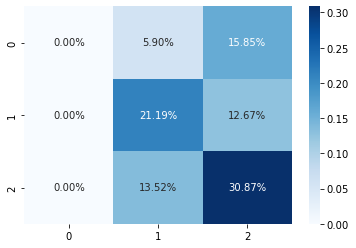

In [71]:
sns.heatmap(c_m/np.sum(c_m), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
""